# Wrangling Missing Data

In [1]:
#import importants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
houses = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(houses.columns)
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
houses.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [5]:
#map and change qualities and conditions
scale2_5 = {'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale5 = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale5na = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale2_5na = {np.nan: 0, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale0245 = {np.nan: 0, 'Fa': 2, 'Gd': 4, 'Ex': 5}

houses['ExterQual'] = [scale2_5[item] for item in houses['ExterQual']]
houses['BsmtQual'] = [scale2_5na[item] for item in houses['BsmtQual']]
houses['KitchenQual'] = [scale2_5na[item] for item in houses['KitchenQual']]
houses['FireplaceQu'] = [scale5na[item] for item in houses['FireplaceQu']]
houses['ExterCond'] = [scale5na[item] for item in houses['ExterCond']]
houses['BsmtCond'] = [scale5na[item] for item in houses['BsmtCond']]
houses['GarageQual'] = [scale5na[item] for item in houses['GarageQual']]
houses['GarageCond'] = [scale5na[item] for item in houses['GarageCond']]
houses['PoolQC'] = [scale0245[item] for item in houses['PoolQC']]
houses['HeatingQC'] = [scale5[item] for item in houses['HeatingQC']]


In [6]:
#repeat on test set
test['ExterQual'] = [scale2_5[item] for item in test['ExterQual']]
test['BsmtQual'] = [scale2_5na[item] for item in test['BsmtQual']]
test['KitchenQual'] = [scale2_5na[item] for item in test['KitchenQual']]
test['FireplaceQu'] = [scale5na[item] for item in test['FireplaceQu']]
test['ExterCond'] = [scale5na[item] for item in test['ExterCond']]
test['BsmtCond'] = [scale5na[item] for item in test['BsmtCond']]
test['GarageQual'] = [scale5na[item] for item in test['GarageQual']]
test['GarageCond'] = [scale5na[item] for item in test['GarageCond']]
test['PoolQC'] = [scale0245[item] for item in test['PoolQC']]
test['HeatingQC'] = [scale5[item] for item in test['HeatingQC']]

In [7]:
houses.LotFrontage.fillna(houses.LotFrontage.mode()[0], inplace=True)
houses.LotFrontage.astype(int)
#repeat on test
test.LotFrontage.fillna(houses.LotFrontage.mode()[0], inplace=True)
test.LotFrontage.astype(int)

0        80
1        81
2        74
3        78
4        43
       ... 
1454     21
1455     21
1456    160
1457     62
1458     74
Name: LotFrontage, Length: 1459, dtype: int64

In [8]:
houses.MasVnrType.fillna(houses.MasVnrType.mode()[0], inplace=True)

#repeat on test
test.MasVnrType.fillna(houses.MasVnrType.mode()[0], inplace=True)

In [9]:
houses.MasVnrArea.fillna(0, inplace=True)
#repeat on test
test.MasVnrArea.fillna(0, inplace=True)


In [10]:
# from data descripion: Gd-Good Exposure, Av-Average Exposure (split levels or foyers typically score average or above), 
#Mn-Mimimum Exposure, No-No Exposure, NA-No Basement
scale_BE = {np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
houses['BsmtExposure'] = [scale_BE[item] for item in houses['BsmtExposure']]

#repeat on test
test['BsmtExposure'] = [scale_BE[item] for item in test['BsmtExposure']]

In [11]:
scale_BT = {np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
houses['BsmtFinType1'] = [scale_BT[item] for item in houses['BsmtFinType1']]

#repeat on test
test['BsmtFinType1'] = [scale_BT[item] for item in test['BsmtFinType1']]

In [12]:
houses['BsmtFinType2'] = [scale_BT[item] for item in houses['BsmtFinType2']]

#repeat on test
test['BsmtFinType2'] = [scale_BT[item] for item in test['BsmtFinType2']]

In [13]:
houses.Fence.unique()


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [14]:
scale_F = {np.nan: 0, 'MnPrv': 4 , 'GdWo': 2, 'GdPrv': 5, 'MnWw': 1}

houses['Fence'] = [scale_F[item] for item in houses['Fence']]

#repeat test
test['Fence'] = [scale_F[item] for item in test['Fence']]

In [15]:
houses.dropna(subset= ['Electrical'], inplace=True)

#repeat on test
test.dropna(subset= ['Electrical'], inplace=True)

In [16]:
scaleGF ={np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
houses.GarageFinish = [scaleGF[item] for item in houses.GarageFinish]

#repeat on test
test.GarageFinish = [scaleGF[item] for item in test.GarageFinish]

In [17]:
#chose to fill in years with the year the house was built. This is when the decition to not build a garage was made.
houses.loc[houses['GarageYrBlt'].isnull(), 'GarageYrBlt'] = houses['YearBuilt'].loc[houses['GarageYrBlt'].isnull()]
pd.to_numeric(houses['GarageYrBlt'], downcast='integer', errors='coerce')

#repeat on test
test.loc[test['GarageYrBlt'].isnull(), 'GarageYrBlt'] = test['YearBuilt'].loc[test['GarageYrBlt'].isnull()]
pd.to_numeric(test['GarageYrBlt'], downcast='integer', errors='coerce')

0       1961
1       1958
2       1997
3       1998
4       1992
        ... 
1454    1970
1455    1970
1456    1960
1457    1992
1458    1993
Name: GarageYrBlt, Length: 1459, dtype: int16

In [18]:
#missing int in test that arn't missing in train set
int0 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

[test[column].fillna(0, inplace=True) for column in int0]


[None, None, None, None, None, None, None, None]

In [19]:
houses.select_dtypes([np.number]).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   int64  
 10  ExterCond      1459 non-null   int64  
 11  BsmtQual       1459 non-null   int64  
 12  BsmtCond       1459 non-null   int64  
 13  BsmtExposure   1459 non-null   int64  
 14  BsmtFinType1   1459 non-null   int64  
 15  BsmtFinSF1     1459 non-null   int64  
 16  BsmtFinType2   1459 non-null   int64  
 17  BsmtFinSF2     1459 non-null   int64  
 18  BsmtUnfS

In [20]:
houses.select_dtypes(exclude=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1459 non-null   object
 16  Exterior2nd    1459 non-null   object
 17  MasVnrType     1459 non-null   object
 18  Foundation     1459 non-null

In [21]:
test.select_dtypes([np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   int64  
 10  ExterCond      1459 non-null   int64  
 11  BsmtQual       1459 non-null   int64  
 12  BsmtCond       1459 non-null   int64  
 13  BsmtExposure   1459 non-null   int64  
 14  BsmtFinType1   1459 non-null   int64  
 15  BsmtFinSF1     1459 non-null   float64
 16  BsmtFinType2   1459 non-null   int64  
 17  BsmtFinSF2     1459 non-null   float64
 18  BsmtUnfS

In [22]:
test.select_dtypes(exclude=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1459 non-null   object
 2   Alley          107 non-null    object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1457 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1458 non-null   object
 16  Exterior2nd    1458 non-null   object
 17  MasVnrType     1459 non-null   object
 18  Foundation     1459 non-null

List of catagorical columns with missing values that will become 0s when we make dumies:
    
Alley, GarageType, Fence, MiscFeature, 

In [23]:
houses.select_dtypes(exclude=[np.number]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
def plot_cat(catagory):
    print(houses[catagory].unique())
    fig = plt.figure(figsize=(12,8))
    ax = sns.boxplot(x=catagory, y='SalePrice', data=houses)
    ax = sns.swarmplot(x=catagory, y='SalePrice', data=houses, color='.25',size=2)
    return fig, ax

In [25]:
df = pd.get_dummies(houses)
df.drop('Id', axis=1, inplace=True)

In [26]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

In [27]:
df_test = pd.get_dummies(test)
df_test.drop('Id', axis=1, inplace=True)

# MSZoning 
Identifies the general zoning classification of the sale.
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Text(0.5, 1.0, 'Number of houses sold per zone')

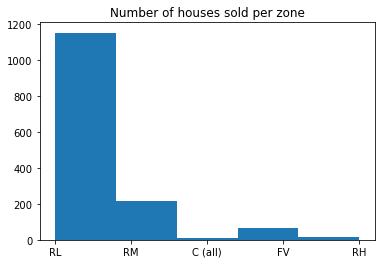

In [28]:
plt.hist(houses.MSZoning, bins=5)
plt.title('Number of houses sold per zone')

['RL' 'RM' 'C (all)' 'FV' 'RH']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>)

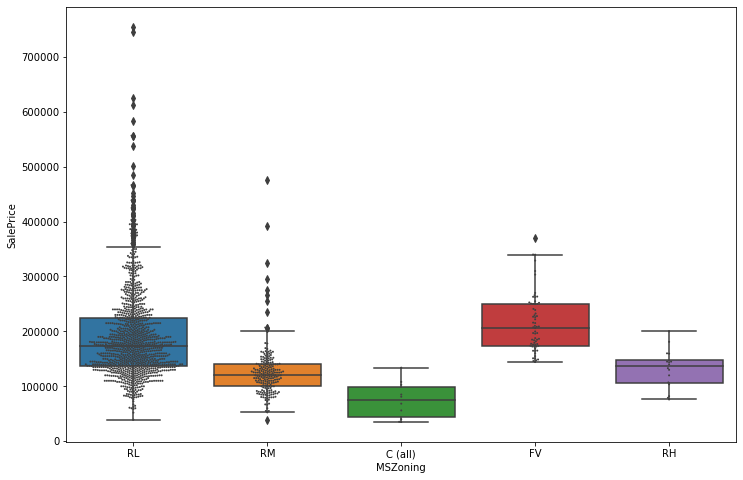

In [29]:
plot_cat('MSZoning')

In [30]:
#df.loc[:, df.columns.str.startswith('MSZoning')]

# Street
whether the street is paved or not

['Pave' 'Grvl']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Street', ylabel='SalePrice'>)

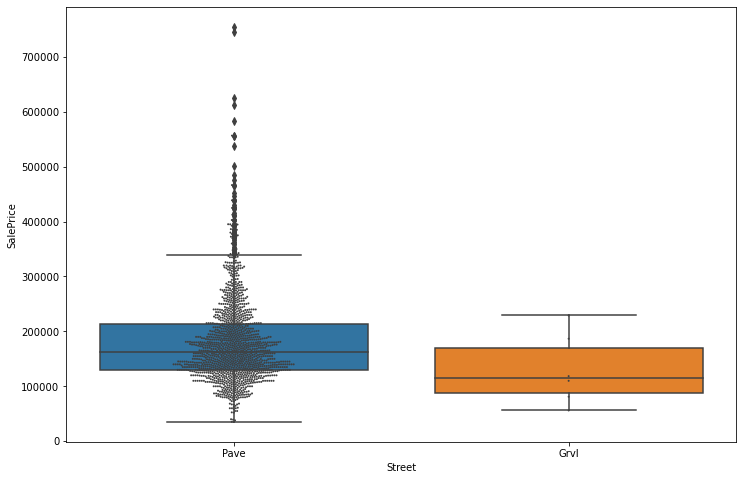

In [31]:
plot_cat('Street')

# Alley
whether there is an alley or not

(array([50., 41.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

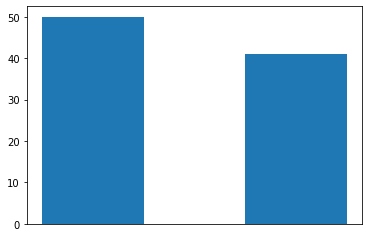

In [32]:
plt.hist(houses.Alley[~houses.Alley.isna()] , bins=2, rwidth=.5)

[nan 'Grvl' 'Pave']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Alley', ylabel='SalePrice'>)

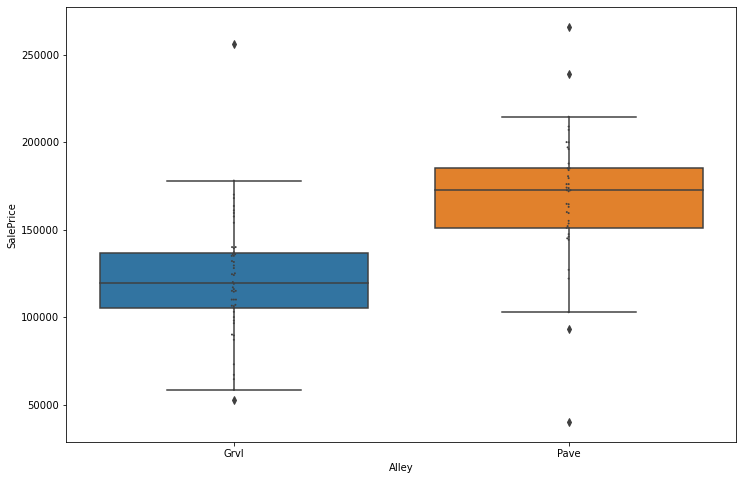

In [33]:
plot_cat('Alley')

# LotShape
General shape of property
       
       Reg - Regular,	
       IR1 - Slightly irregular,
       IR2 - Moderately Irregular,
       IR3 - Irregular,

(array([924.,   0.,   0., 484.,   0.,   0.,  41.,   0.,   0.,  10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

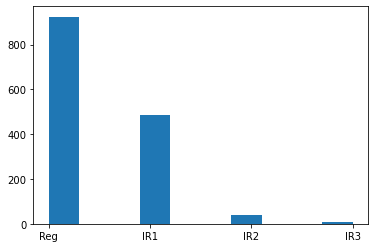

In [34]:
plt.hist(houses.LotShape)

['Reg' 'IR1' 'IR2' 'IR3']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>)

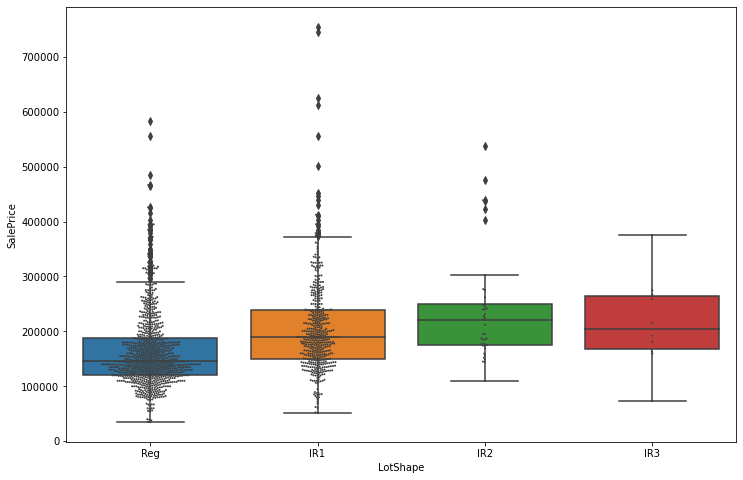

In [35]:
plot_cat('LotShape')

# LandContour
Flatness of the property

Lvl - Near Flat/Level, Bnk - Banked/Quick and significant rise from street grade to building, HLS - Hillside/Significant slope from side to side, Low - Depression

['Lvl' 'Bnk' 'Low' 'HLS']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>)

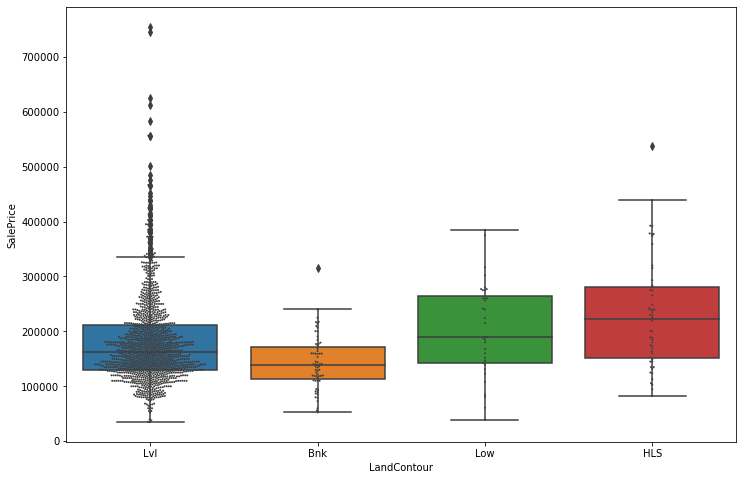

In [36]:
plot_cat('LandContour')

# Utilities
Type of utilities available
		
       AllPub - All public Utilities (E,G,W,& S)	
       NoSewr - Electricity, Gas, and Water (Septic Tank)
       NoSeWa - Electricity and Gas Only
       ELO - Electricity only

['AllPub' 'NoSeWa']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>)

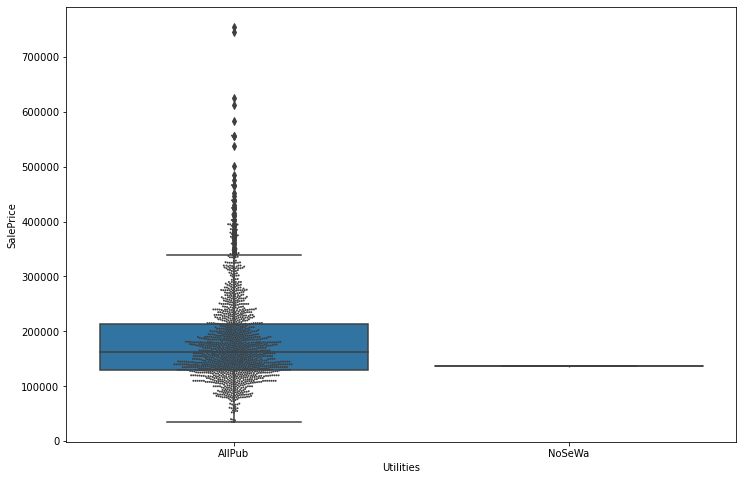

In [37]:
plot_cat('Utilities')

# LotConfig
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>)

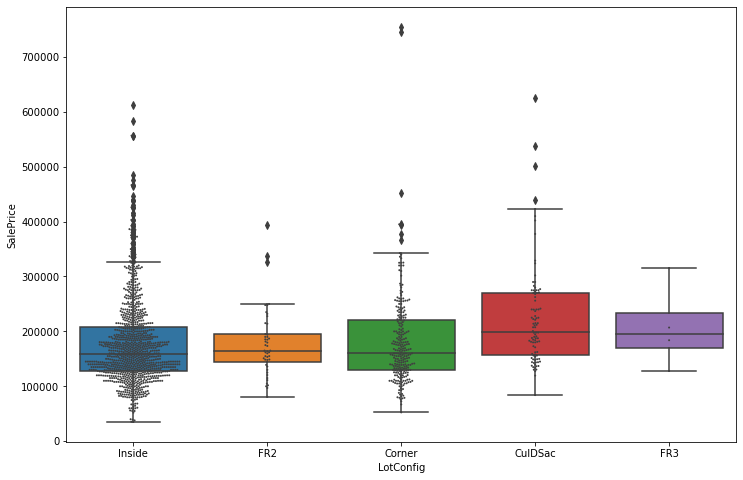

In [38]:
plot_cat('LotConfig')

# LandSlope
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

['Gtl' 'Mod' 'Sev']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>)

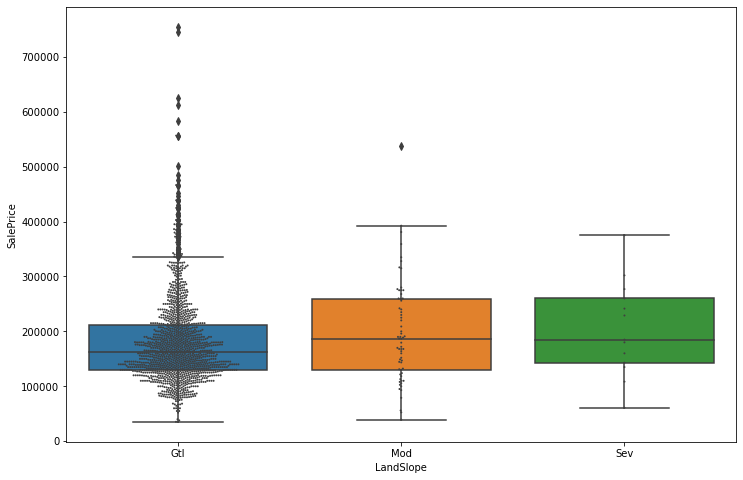

In [39]:
plot_cat('LandSlope')

# Neighborhood
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>)

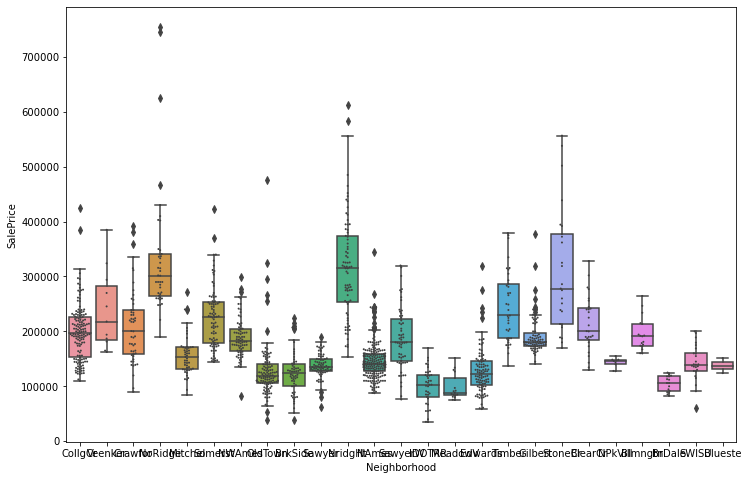

In [40]:
plot_cat('Neighborhood')

# Condition1
Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>)

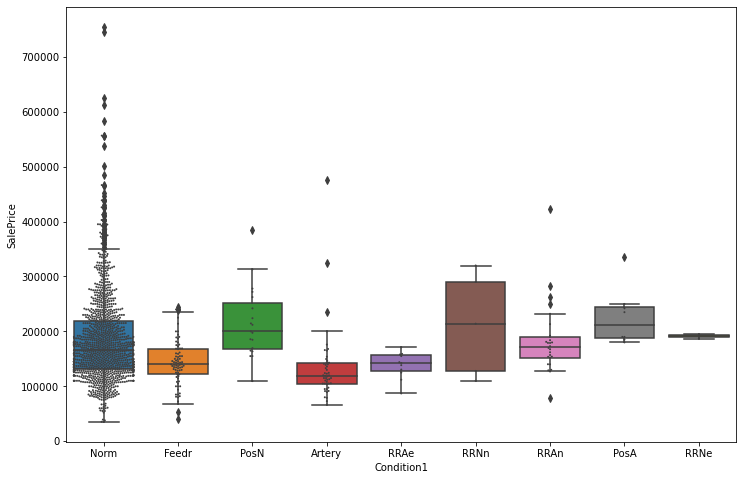

In [41]:
plot_cat('Condition1')

# Condition2
Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>)

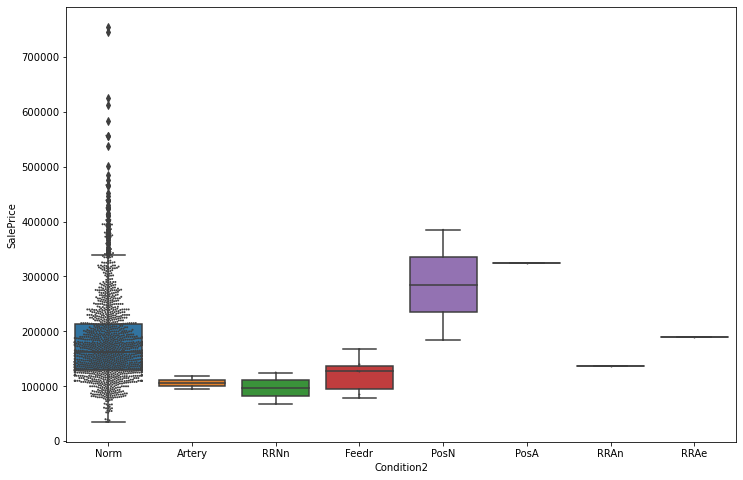

In [42]:
plot_cat('Condition2')

# BldgType
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>)

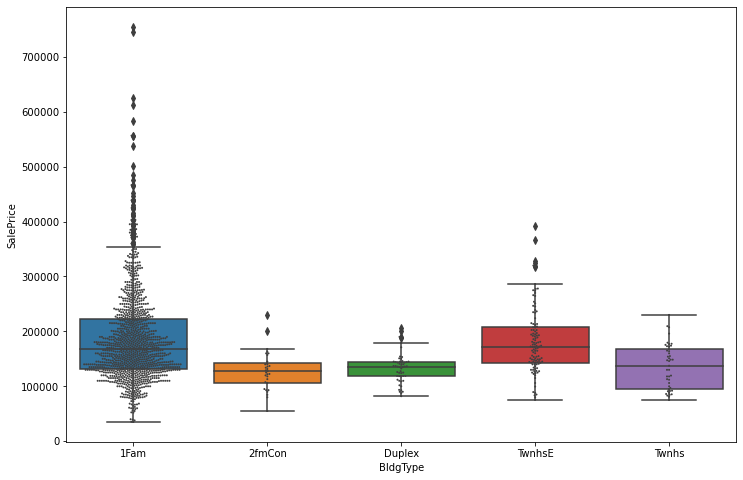

In [43]:
plot_cat('BldgType')

# HouseStyle
Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>)

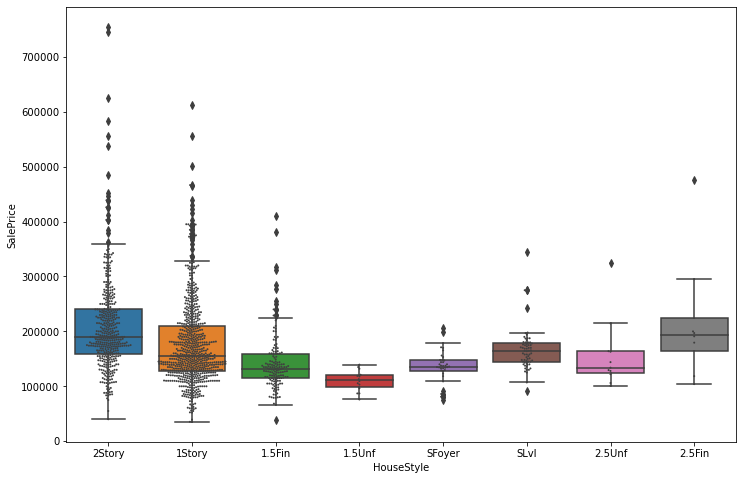

In [44]:
plot_cat('HouseStyle')

# RoofStyle
Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>)

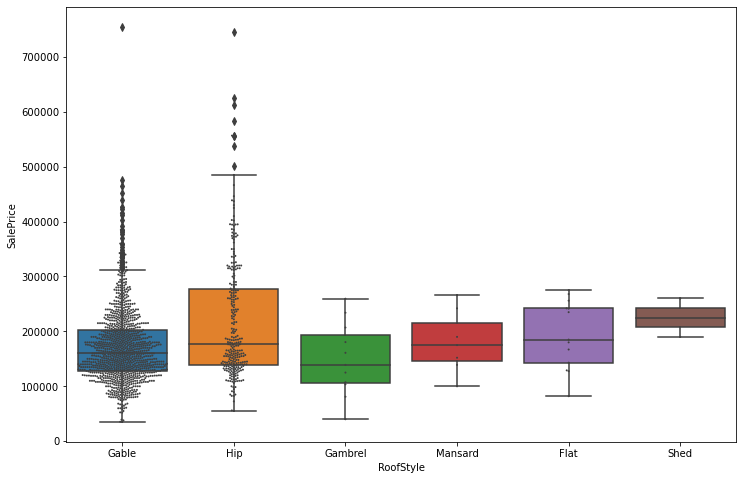

In [45]:
plot_cat('RoofStyle')

# RoofMatl
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>)

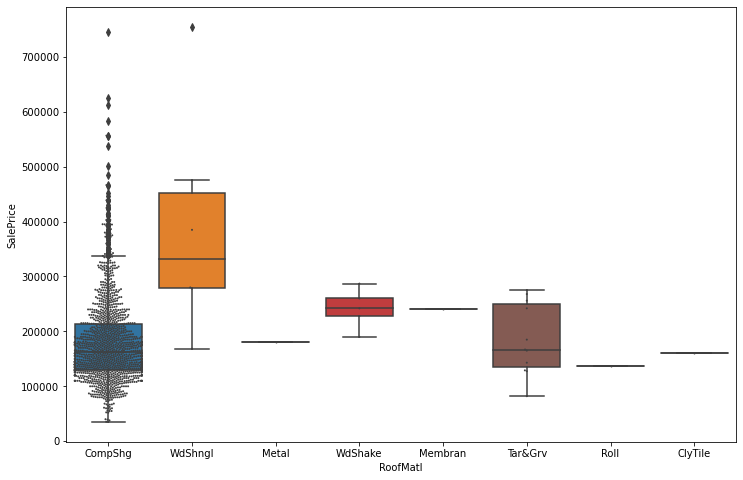

In [46]:
plot_cat('RoofMatl')

# Exterior1st
Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>)

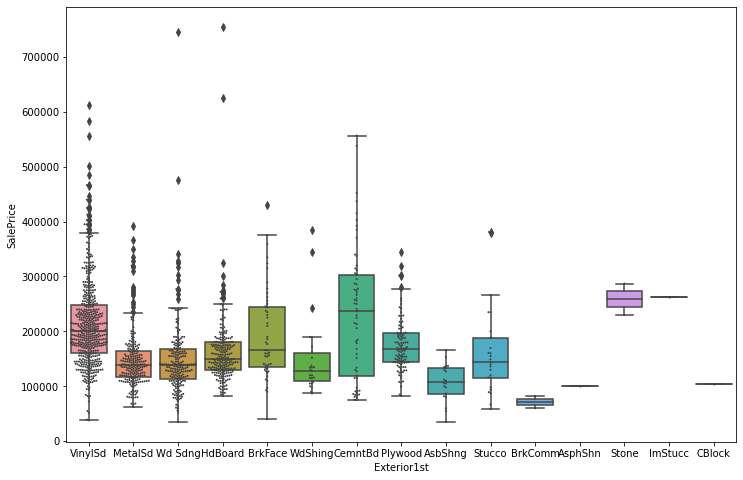

In [47]:
plot_cat('Exterior1st')

# Exterior2nd
Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>)

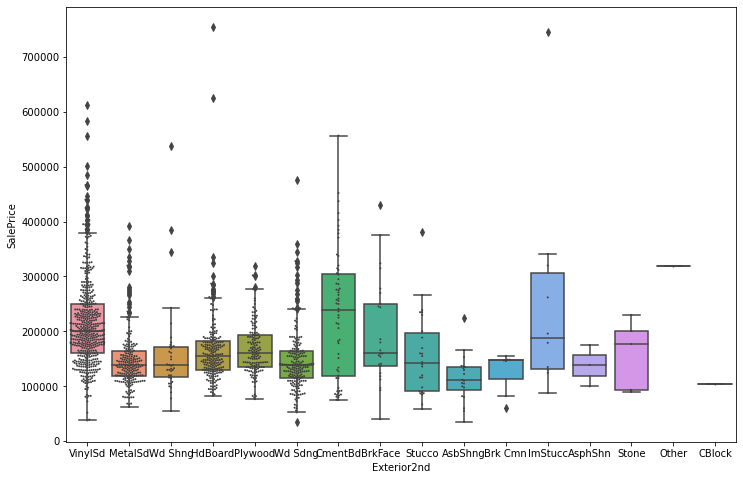

In [48]:
plot_cat('Exterior2nd')

# MasVnrType
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

['BrkFace' 'None' 'Stone' 'BrkCmn']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>)

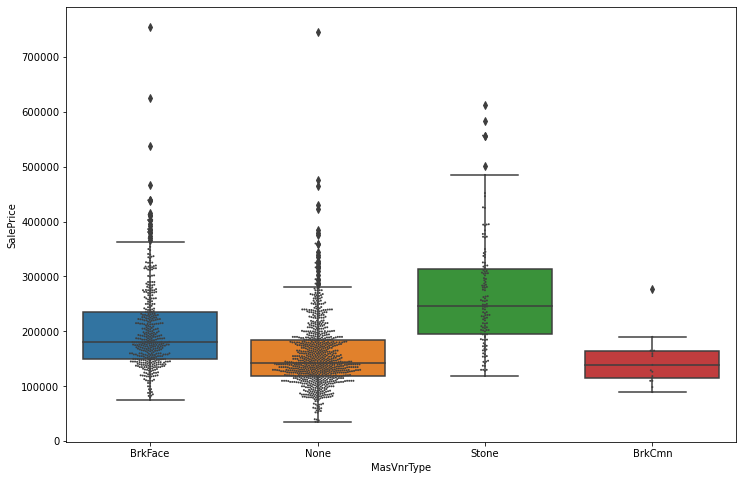

In [49]:
plot_cat('MasVnrType')

# Foundation
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>)

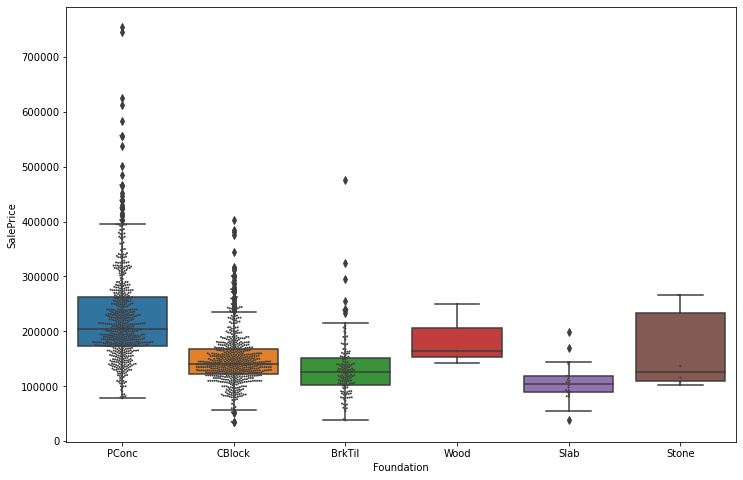

In [50]:
plot_cat('Foundation')

# Heating
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace


['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Heating', ylabel='SalePrice'>)

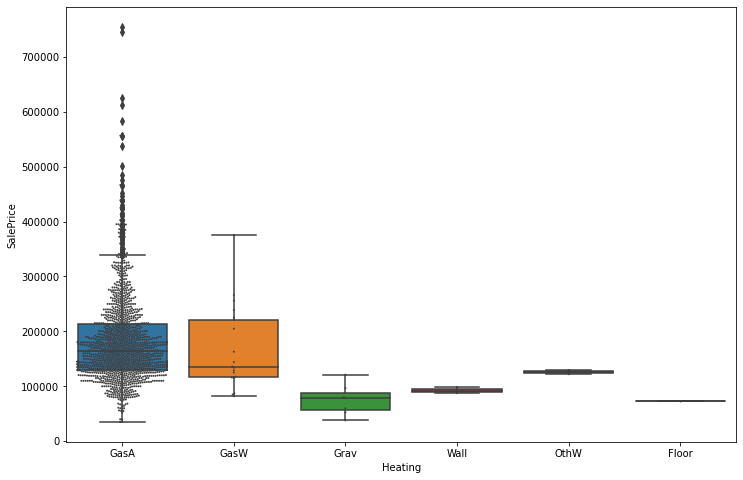

In [51]:
plot_cat('Heating')

# CentralAir
Central air conditioning

       N	No
       Y	Yes

['Y' 'N']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>)

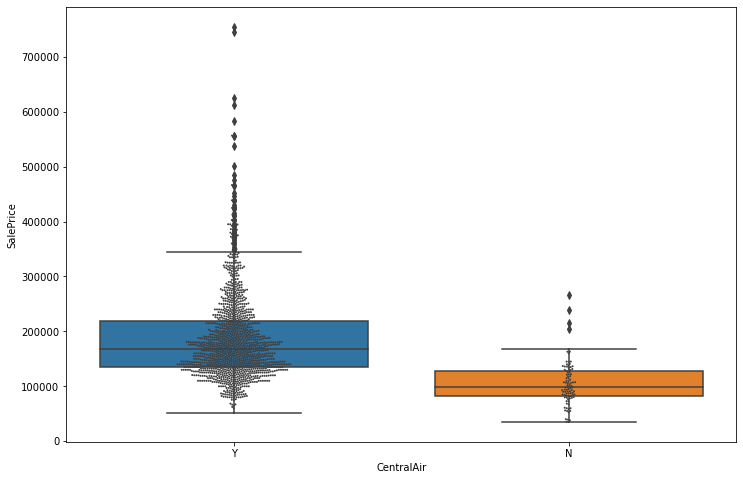

In [52]:
plot_cat('CentralAir')

# Electrical 
 Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>)

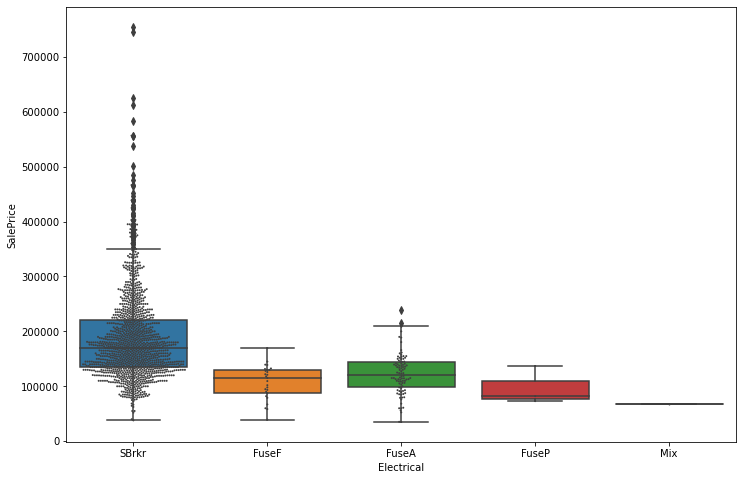

In [53]:
plot_cat('Electrical')

# Functional
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Functional', ylabel='SalePrice'>)

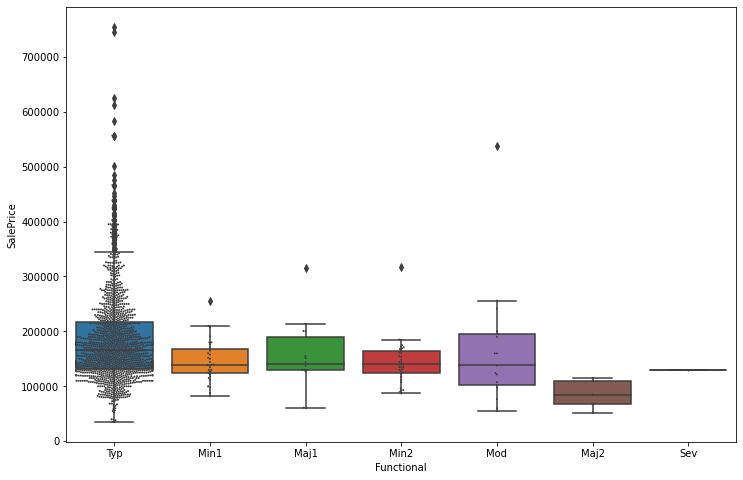

In [54]:
plot_cat('Functional')

# GarageType
Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage


['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>)

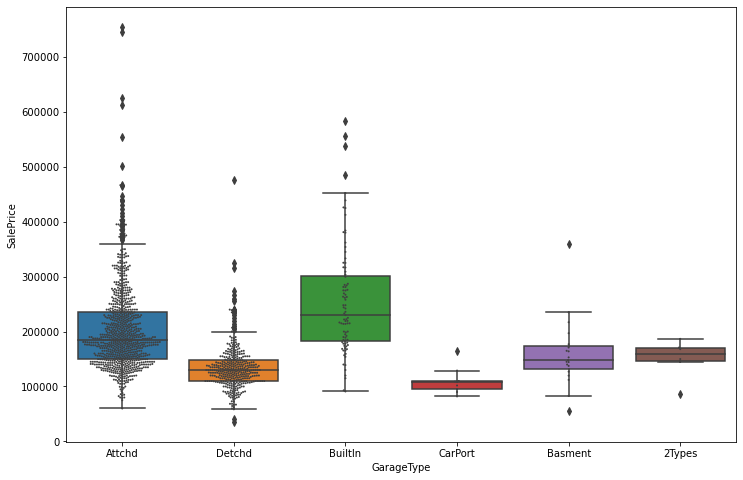

In [55]:
plot_cat('GarageType')

# PavedDrive
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

['Y' 'N' 'P']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>)

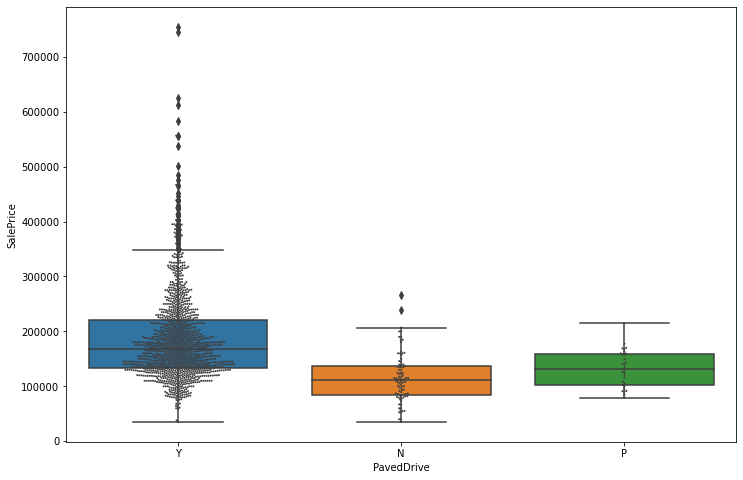

In [56]:
plot_cat('PavedDrive')

# MiscFeature
Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>)

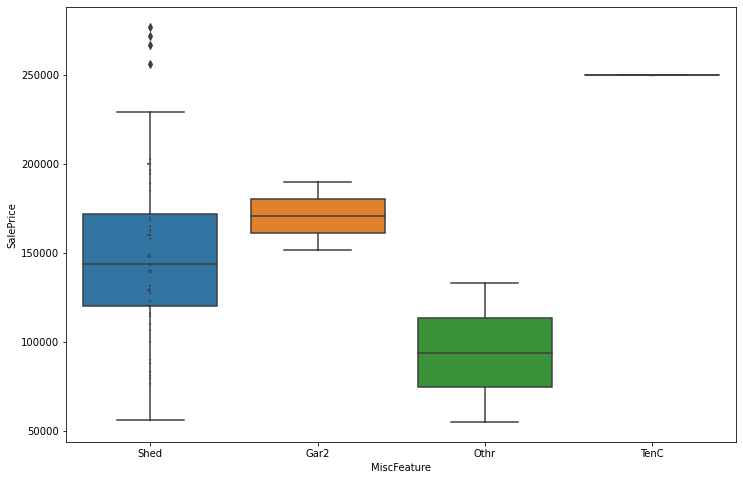

In [57]:
plot_cat('MiscFeature')

# SaleType
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>)

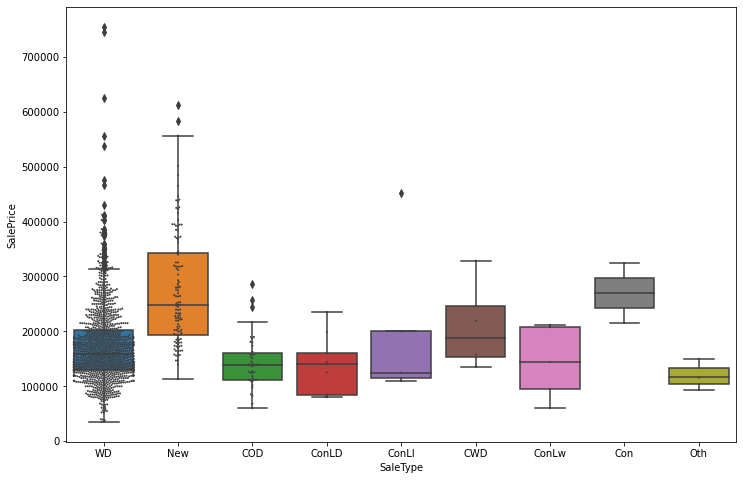

In [58]:
plot_cat('SaleType')

# SaleCondition
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>)

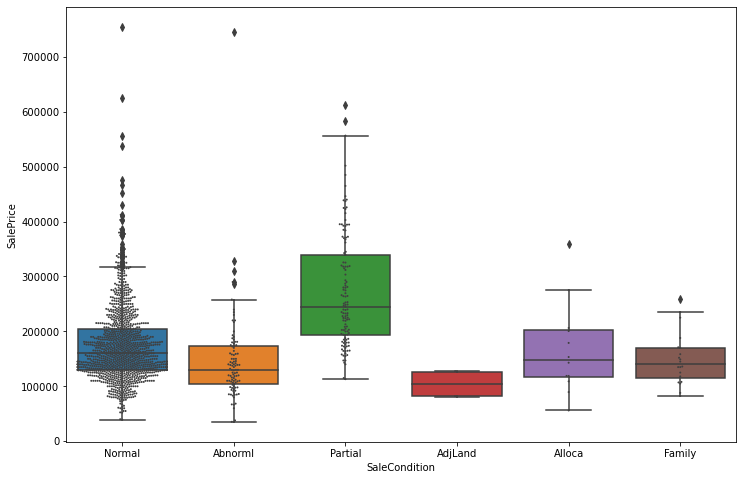

In [59]:
plot_cat('SaleCondition')

In [60]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.349236,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023792,0.016440,-0.064604,...,0.014029,-0.045049,-0.014540,0.026216,0.005106,0.016262,0.030039,0.001027,0.024188,-0.050961
LotFrontage,-0.349236,1.000000,0.281299,0.237061,-0.056392,0.107311,0.087205,0.174251,0.167845,-0.023510,...,-0.046333,0.147725,-0.019486,-0.107058,-0.020370,-0.032281,-0.017369,0.019702,-0.090726,0.146347
LotArea,-0.139766,0.281299,1.000000,0.105786,-0.005665,0.014296,0.013852,0.103302,0.055542,0.014720,...,-0.015044,0.020024,-0.005724,-0.002271,-0.029142,-0.013211,0.008961,-0.010787,0.005737,0.022620
OverallQual,0.032936,0.237061,0.105786,1.000000,-0.092243,0.573334,0.551605,0.407075,0.726178,0.013826,...,-0.021208,0.327328,-0.058000,-0.224861,-0.103708,-0.041715,-0.045010,-0.025585,-0.143069,0.323208
OverallCond,-0.059134,-0.056392,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.125922,-0.139222,0.389122,...,-0.019802,-0.156301,-0.050683,0.163846,-0.046469,-0.038910,-0.033479,-0.023917,0.161835,-0.151786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016262,-0.032281,-0.013211,-0.041715,-0.038910,-0.045580,-0.040271,-0.011805,-0.036176,-0.049829,...,-0.003075,-0.015838,-0.002380,0.020472,-0.014299,1.000000,-0.004775,-0.006181,-0.112071,-0.016050
SaleCondition_Alloca,0.030039,-0.017369,0.008961,-0.045010,-0.033479,-0.010037,-0.020669,-0.013785,-0.049615,-0.000074,...,-0.005340,-0.027509,-0.004134,0.035556,-0.024835,-0.004775,1.000000,-0.010736,-0.194649,-0.027876
SaleCondition_Family,0.001027,0.019702,-0.010787,-0.025585,-0.023917,-0.035708,-0.047989,-0.009582,-0.050542,0.022293,...,-0.006913,-0.035612,-0.005351,0.028632,-0.032151,-0.006181,-0.010736,1.000000,-0.251989,-0.036088
SaleCondition_Normal,0.024188,-0.090726,0.005737,-0.143069,0.161835,-0.158880,-0.120977,-0.081371,-0.184125,0.055487,...,0.027435,-0.645670,-0.097023,0.634278,-0.582918,-0.112071,-0.194649,-0.251989,1.000000,-0.654295


<AxesSubplot:>

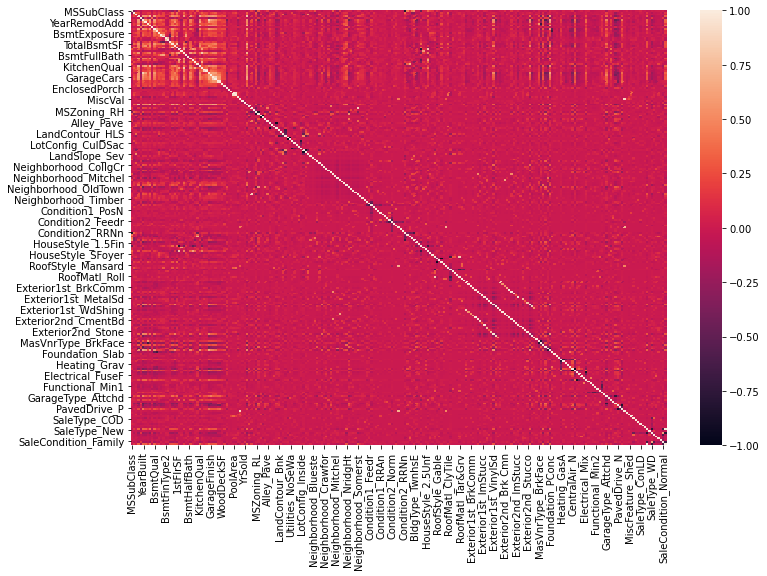

In [61]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [ ]:
#sns.pairplot(df)    -ouch will never run